# Proyecto Final Data Science - Lautaro Fernandez.

### Metas

En esta oportuinidad trabajaré sobre un dataset extraído del pool de datasets ofrecidos por la institución durante la cursada, el mismo aborda la satisfacción de los clientes de una aerolínea anónima y comprende un total de 22 variables sin contar la variable objetivo "satisfaction".

### Objetivo

En el camino, intentaremos predecir la satisfacción de los clientes utilizando algorítmos de Machine Learning y más.

### Contexto comercial

El modelo de negocio de una aerolínea es sencillo: ofrecer un servicio. Que es distinto de ofrecer un bien, sin embargo, el éxito del negocio se basa siempre en el mismo pilar: la satisfacción del cliente. ¿Cuáles son los factores que más influyen en la valoración del cliente acerca de su viaje? Es una de las preguntas que se verán respondidas al finalizar este trabajo.

### Contexto analítico

Durante este trabajo se realizará: 

- Data acquisition.

- EDA (Exploratory Data Analysis) consistente a su vez en:
    - Análisis y muestreo inicial.
    - Análisis univariado. 
    - Análisis bivariado. 
    - Análisis multivariado. 
    
- Feature Engineer 

- Entrenamiento de modelos

- Búsqueda hiperparametros

- Conclusión.

# Data Acquisition


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

### Diccionario de variables: 

- Gender: Género de los pasajeros (Female, Male)

- Customer Type: el tipo de cliente (Loyal customer, disloyal customer)

- Age: La edad real de los pasajeros.

- Type of Travel: Propósito del vuelo de los pasajeros (Personal Travel, Business Travel)

- Class: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

- Flight distance: la distancia de vuelo de este viaje.

- Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada conveniente

- Ease of Online booking: nivel de satisfacción de la reserva en línea.

- Gate location: Nivel de satisfacción de la ubicación de la puerta.

- Food and drink: Nivel de satisfacción de Comida y bebida.

- Online boarding: Nivel de satisfacción del embarque online.

- Seat comfort: Nivel de satisfacción del confort del asiento.

- Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo.

- On-board service: Nivel de satisfacción del servicio a bordo.

- Leg room service: Nivel de satisfacción del servicio de habitaciones para piernas.

- Baggage handling: Nivel de satisfacción en el manejo de equipaje.

- Check-in service: Nivel de satisfacción del servicio de Check-in.

- Inflight service: Nivel de satisfacción del servicio a bordo.

- Cleanliness: Nivel de satisfacción de la Limpieza.

- Departure Delay in Minutes: Minutos de retraso a la salida.

- Arrival Delay in Minutes: Minutos de retraso cuando llega.

- Satisfaction: Nivel de satisfacción de la aerolínea (Satisfaction, neutral-dissatisfaction)

# Exploratory Data Analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
print("Dimensionalidad de los datos de entrenamiento:", df.shape)

Dimensionalidad de los datos de entrenamiento: (103904, 25)


In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


# Interpretaciones: 

Columna "Age": Esta columna representa la edad de los pasajeros, con un rango que va desde 7 hasta 85 años. La edad promedio es de aproximadamente 39.43 años, con una desviación estándar de aproximadamente 15.12, lo que indica cierta variabilidad en las edades. El análisis de esta variable podría revelar cómo la satisfacción varía según la edad de los pasajeros.

Columna "Flight Distance": Muestra la distancia de vuelo para cada pasajero, que varía desde 31 hasta 4,983 millas. La distancia promedio es de aproximadamente 1,190.32 millas, con una desviación estándar de alrededor de 997.45, lo que indica una variabilidad significativa. Esta variable podría influir en la satisfacción, ya que vuelos más largos pueden implicar diferentes experiencias.

Columnas de satisfacción de servicios (por ejemplo, "Inflight wifi service," "Departure/Arrival time convenient," "Ease of Online booking," etc.): Estas columnas representan niveles de satisfacción en diferentes aspectos del servicio de la aerolínea, como wifi en vuelo, conveniencia de la hora de salida/llegada, facilidad de reserva en línea, ubicación de la puerta, comida y bebida, abordaje en línea, comodidad del asiento, entre otros. Cada una de estas columnas tiene una puntuación que varía del 0 al 5, lo que sugiere una escala de satisfacción. El análisis de estas variables puede revelar qué aspectos del servicio están más relacionados con la satisfacción de los pasajeros y cómo se distribuyen las calificaciones.

Columna "Departure Delay in Minutes": Representa la cantidad de minutos de retraso en la hora de salida, con un valor mínimo de 0 y un valor máximo de 1,592 minutos. La mayoría de los vuelos parecen tener un retraso bajo, ya que el tercer cuartil (75%) se encuentra en 12 minutos. El análisis de esta variable podría ayudar a comprender cómo los retrasos en la salida afectan la satisfacción de los pasajeros.

Columna "Arrival Delay in Minutes": Similar a la columna anterior, pero para el retraso en la hora de llegada. La mediana (50%) es de 0 minutos, lo que sugiere que al menos la mitad de los vuelos llegaron a tiempo, mientras que el valor máximo es de 1,584 minutos, lo que indica vuelos con retrasos significativos. Esta variable es relevante para evaluar la puntualidad y su impacto en la satisfacción de los pasajeros.

In [8]:
# Variables tipo "object"
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Contar la cantidad en cada categoría
for variable in categorical_variables:
    category_counts = df[variable].value_counts()
    print(f"Categorías en {variable}:")
    print(category_counts)
    print()

Categorías en Gender:
Gender
Female    52727
Male      51177
Name: count, dtype: int64

Categorías en Customer Type:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

Categorías en Type of Travel:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

Categorías en Class:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

Categorías en satisfaction:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64



- Interpretación y Explicación:

    - Gender (Género): Se observa que en la categoría "Gender," las dos categorías posibles son "Female" y "Male." El resultado muestra que hay 65,899 pasajeros de género femenino y 63,981 pasajeros de género masculino en el conjunto de datos. Esto proporciona una visión de la distribución de género de los pasajeros en el conjunto de datos.

    - Customer Type (Tipo de Cliente): Para la variable "Customer Type," se distinguen dos categorías: "Loyal Customer" (Cliente Leal) y "disloyal Customer" (Cliente Desleal). El resultado indica que hay 106,100 clientes leales y 23,780 clientes desleales en el conjunto de datos. Esta información es relevante para comprender la lealtad de los clientes.

    - Type of Travel (Tipo de Viaje): En la variable "Type of Travel," se identifican dos categorías: "Business travel" (Viaje de Negocios) y "Personal Travel" (Viaje Personal). El análisis muestra que hay 89,693 pasajeros que viajaron por negocios y 40,187 que viajaron por motivos personales.

    - Class (Clase): Para la variable "Class," se encuentran tres categorías: "Business" (Clase Ejecutiva), "Eco" (Económica) y "Eco Plus." Los resultados indican que hay 62,160 pasajeros en clase ejecutiva, 58,309 en clase económica y 9,411 en la clase económica premium ("Eco Plus").

    - Satisfaction (Satisfacción): La variable objetivo "Satisfaction" (Satisfacción) muestra dos categorías posibles: "neutral or dissatisfied" (neutral o insatisfecho) y "satisfied" (satisfecho). El análisis revela que 73,452 pasajeros se encuentran en la categoría de neutral o insatisfecho, mientras que 56,428 pasajeros están satisfechos.

# Un poco de Data Visualization

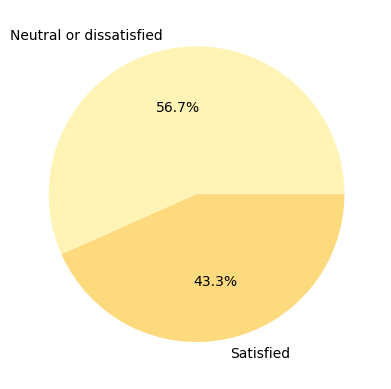

In [54]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

### Resulta importante recalcar que la variable objetivo a predecir se encuentra dentro de los parámetros que podríamos considerar como "balanceados", cercano a un 60/40. Lo cual es bastante aceptable.

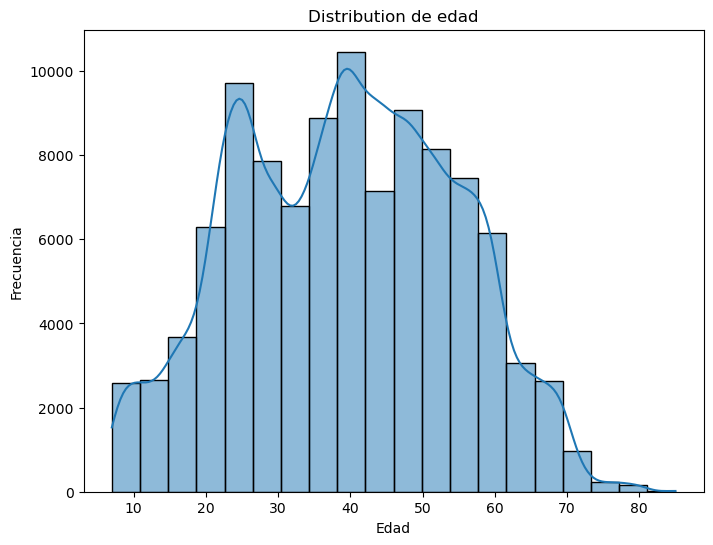

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

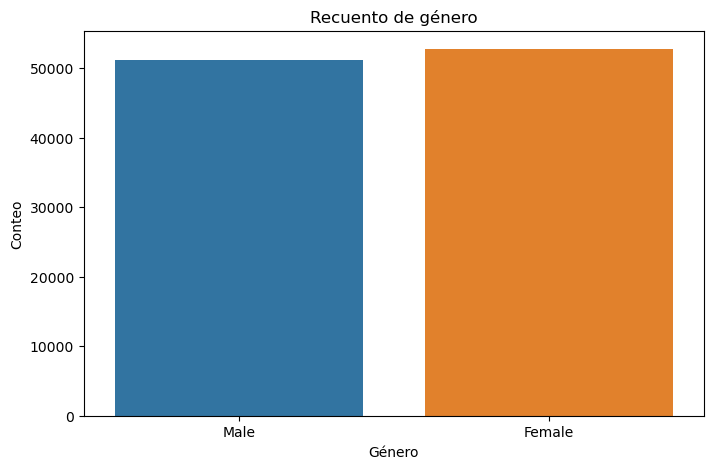

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Recuento de género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

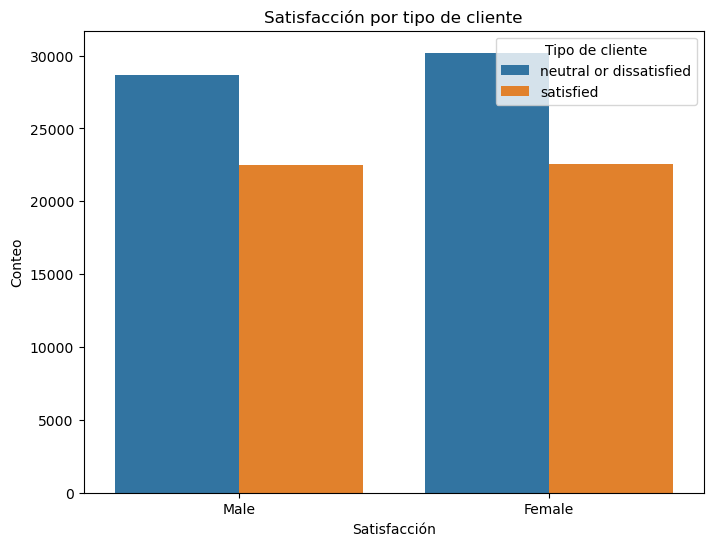

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Satisfacción por tipo de cliente')
plt.xlabel('Satisfacción')
plt.ylabel('Conteo')
plt.legend(title='Tipo de cliente')
plt.show()

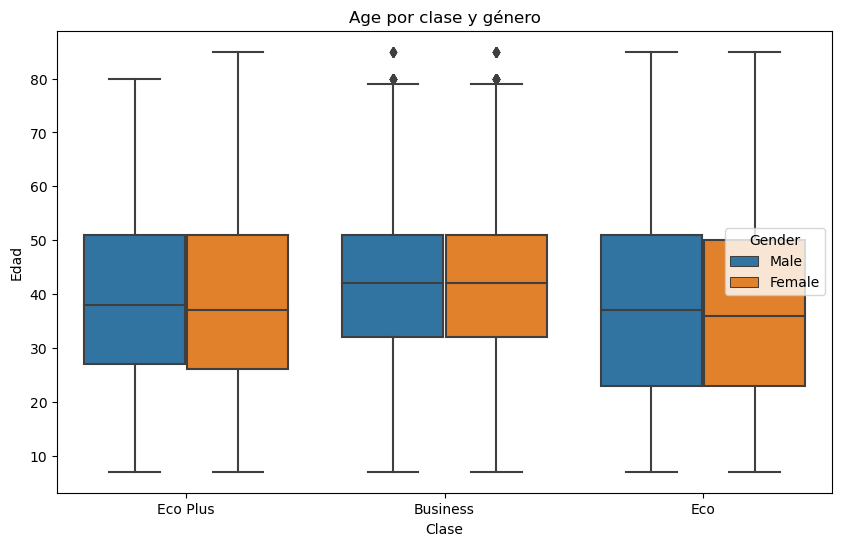

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', hue='Gender', data=df)
plt.title('Age por clase y género')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

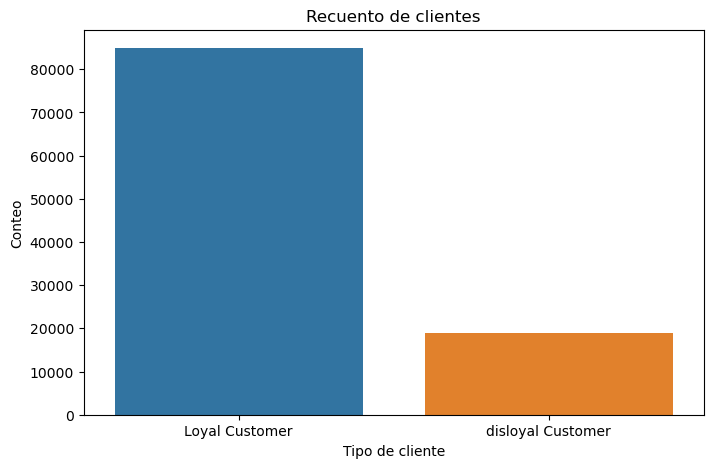

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Type', data=df)
plt.title('Recuento de clientes')
plt.xlabel('Tipo de cliente')
plt.ylabel('Conteo')
plt.show()

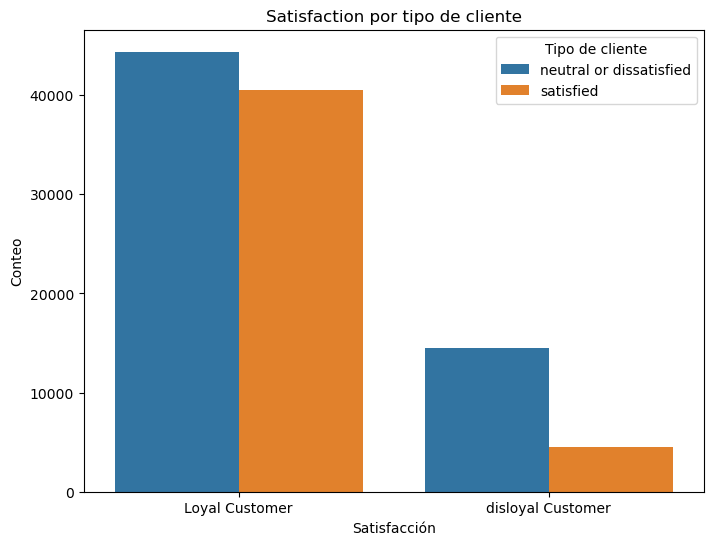

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='satisfaction', data=df)
plt.title('Satisfaction por tipo de cliente')
plt.xlabel('Satisfacción')
plt.ylabel('Conteo')
plt.legend(title='Tipo de cliente')
plt.show()

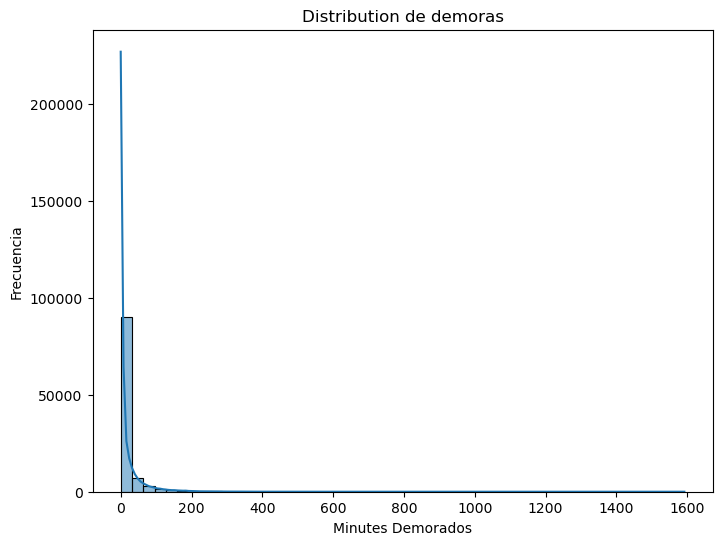

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Departure Delay in Minutes'], bins=50, kde=True)
plt.title('Distribution de demoras')
plt.xlabel('Minutes Demorados')
plt.ylabel('Frecuencia')
plt.show()

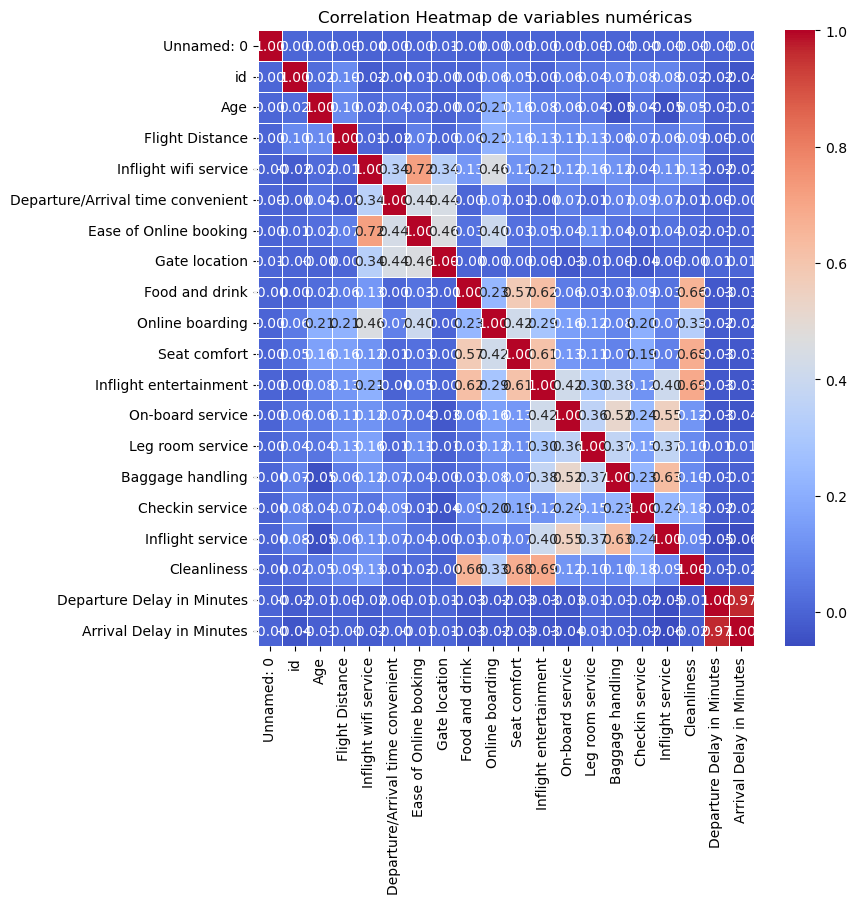

In [16]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 8))
corr = numerical_vars.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap de variables numéricas')
plt.show()

# Data Wrangling

- Eliminación de columnas que no son de interés.

In [17]:
df = df.drop(["Unnamed: 0", "id"], axis=1)

- Identificación de valores nulos:

In [18]:
# Identificar valores nulos en el DataFrame
null_values = df.isnull()

# Sumar los valores nulos por columna
null_counts = null_values.sum()

# Visualizar las columnas con valores nulos y la cantidad de nulos por columna
print("Valores nulos por columna:")
print(null_counts)

Valores nulos por columna:
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


- Identificación de valores faltantes:

In [19]:
# Identificar valores faltantes en el DataFrame
missing_values = df.isna()

# Sumar los valores faltantes por columna
missing_counts = missing_values.sum()

# Visualizar las columnas con valores faltantes y la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(missing_counts)

Valores faltantes por columna:
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


Se observa que la mayoría de las columnas no tienen valores nulos. Sin embargo, la columna "Arrival Delay in Minutes" tiene 393 valores nulos. Esto significa que hay 393 registros en los que no se registró ningún valor para la variable "Arrival Delay in Minutes."

La identificación de valores nulos es un paso crítico en la preparación de datos, ya que los valores faltantes pueden afectar negativamente el análisis y los modelos de predicción.

- Identificación de valores duplicados:

In [20]:
# Identificar valores duplicados en el DataFrame
duplicates = df[df.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
duplicates

Filas duplicadas:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


En este caso, el resultado indica que no se encontraron filas duplicadas en el conjunto de datos. Esto significa que no hay registros idénticos en todas las columnas del DataFrame.

La identificación y eliminación de valores duplicados es un paso importante en la preparación de datos, ya que asegura que cada registro sea único y evita distorsiones en el análisis y los resultados. La ausencia de filas duplicadas en este conjunto de datos es un hallazgo positivo y sugiere que la calidad de los datos es alta en términos de duplicados.

- Escalamiento de variables numéricas:

In [21]:
from sklearn.preprocessing import RobustScaler

# Identificar las columnas numéricas
numeric_features = ["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient",
                   "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
                   "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service",
                   "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",
                   "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Crear un objeto RobustScaler
scaler = RobustScaler()

# Aplicar el escalado a las columnas numéricas
df[numeric_features] = scaler.fit_transform(df[numeric_features])

- Escalamiento de variables categóricas nominales:

In [22]:
from sklearn.preprocessing import OneHotEncoder

# Identifico variables categóricas
categorical_features = ["Gender", "Customer Type", "Type of Travel"]

# Creo objeto. 
encoder = OneHotEncoder(drop="first", handle_unknown='ignore')  # Optional for unseen categories

# Apico One-Hot encoder. 
encoded_features = encoder.fit_transform(df[categorical_features])

# Tomo las variables.
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Creo nuevo dataframe.
encoded_columns = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)

# Concateno. 
df = pd.concat([df, encoded_columns], axis=1)

# Tiro el original.
df.drop(categorical_features, axis=1, inplace=True)

- Escalamiento de variables categóricas ordinales:


In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Identificar la columna categórica ordinal
ordinal_features = ["Class"]

# Definir el orden de las categorías
class_categories = [["Business", "Eco", "Eco Plus"]]

# Crear un objeto OrdinalEncoder con las categorías especificadas
ordinal_encoder = OrdinalEncoder(categories=class_categories)

# Aplicar el escalado a la columna categórica ordinal
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

- Codificación de etiquetas en variable objetivo:

In [24]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
target_features = ["satisfaction"]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode each column separately
for col in target_features:
  df["satisfaction"] = label_encoder.fit_transform(df["satisfaction"])



- Manejo de valores nulos mediante imputación con algoritmo de aprendizaje automático:

In [25]:
print("Valores nulos en Arrival Delay in Minutes:", df["Arrival Delay in Minutes"].isnull().sum())

Valores nulos en Arrival Delay in Minutes: 310


In [26]:
from sklearn.linear_model import LinearRegression
# Paso 1: Separar los datos
# Datos de entrenamiento (sin valores nulos en "Arrival Delay in Minutes")
train_data = df.dropna(subset=["Arrival Delay in Minutes"])

# Datos a imputar (con valores nulos en "Arrival Delay in Minutes")
impute_data = df[df["Arrival Delay in Minutes"].isnull()]

# Paso 2: Seleccionar el modelo
model = LinearRegression()

# Paso 3: Entrenar el modelo
X = train_data.drop(["Arrival Delay in Minutes"], axis=1)
y = train_data["Arrival Delay in Minutes"]
model.fit(X, y)

# Paso 4: Predecir valores faltantes
X_impute = impute_data.drop(["Arrival Delay in Minutes"], axis=1)
predicted_values = model.predict(X_impute)

# Paso 5: Sustituir los valores nulos con las predicciones
df.loc[df["Arrival Delay in Minutes"].isnull(), "Arrival Delay in Minutes"] = predicted_values

# Verificar que no hay valores nulos restantes en "Arrival Delay in Minutes"
print("Valores nulos en Arrival Delay in Minutes:", df["Arrival Delay in Minutes"].isnull().sum())

Valores nulos en Arrival Delay in Minutes: 0


# Creación y evaluación del modelo

In [27]:
# Definir las variables predictoras (características)
X = df.drop("satisfaction", axis=1)

# Definir la variable objetivo
y = df["satisfaction"]

En este paso, se crea el conjunto de datos X que contiene todas las columnas del conjunto de datos original excepto la variable objetivo. En este caso, la variable objetivo es "satisfaction," que se ha eliminado de X. Las características representan la información que se utilizará para predecir la satisfacción de los clientes de la aerolínea. Asimismo, se crea la variable y, que contiene la columna "satisfaction." Esta variable objetivo se utiliza para entrenar y evaluar el modelo con el objetivo de predecir si un cliente está satisfecho o insatisfecho con su experiencia de vuelo.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (72732, 22)
Dimensiones de X_test: (31172, 22)
Dimensiones de y_train: (72732,)
Dimensiones de y_test: (31172,)


La división en conjuntos de entrenamiento y prueba es fundamental para evaluar la capacidad del modelo para generalizar a nuevos datos. Los datos de entrenamiento permiten al modelo aprender patrones, mientras que los datos de prueba se utilizan para medir su rendimiento en datos no vistos previamente. La verificación de dimensiones es importante para asegurarse de que la división se haya realizado correctamente y que los conjuntos tengan el tamaño esperado.

## Búsqueda de mejor modelo con hiperparámetros

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Crear un objeto de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros que se desea ajustar y sus posibles valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Crear un objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Verificar los resultados
print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)

Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       random_state=42)
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10}


## Creación de objeto y entrenamiento del mejor modelo encontrado

In [30]:
# Crear un objeto de árbol de decisión con los mejores hiperparámetros encontrados
best_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       random_state=42)

In [31]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Resultados en matriz de confusión

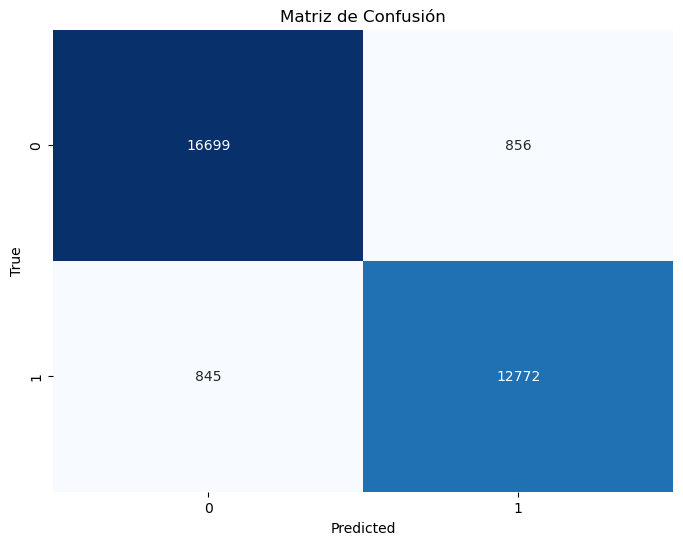

In [32]:
# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear una figura
plt.figure(figsize=(8, 6))

# Usar Seaborn para visualizar la matriz de confusión
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Configurar etiquetas y título
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()

In [33]:
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.945431797767227


In [34]:
# Generar el informe de clasificación que incluye precisión, recall y puntuación F1
report = classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied'])
print("Informe de Clasificación:")
print(report)

Informe de Clasificación:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     17555
              satisfied       0.94      0.94      0.94     13617

               accuracy                           0.95     31172
              macro avg       0.94      0.94      0.94     31172
           weighted avg       0.95      0.95      0.95     31172



# Llegados hasta aquí, podemos decir que hemos logrado un resultado predictivo muy bueno, hagamos una pequeña validación cruzada adicional con otros modelos a ver si podemos mejorarlo un poco...

In [46]:
import plotly.express as px
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from scipy import stats

### Random Forest.


In [47]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9603055699199196
              precision    recall  f1-score   support

           0    0.95514   0.97995   0.96738     17555
           1    0.97325   0.94066   0.95668     13617

    accuracy                        0.96279     31172
   macro avg    0.96420   0.96031   0.96203     31172
weighted avg    0.96305   0.96279   0.96271     31172



### LightGBM.


In [48]:
params_lgb ={'colsample_bytree': 0.85, 
         'max_depth': 15, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31408, number of negative: 41324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 72732, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431832 -> initscore=-0.274381
[LightGBM] [Info] Start training from score -0.274381
ROC_AUC = 0.9620742262899675
              precision    recall  f1-score   support

           0    0.95669   0.98143   0.96890     17555
           1    0.97523   0.94272   0.95870     13617

    accuracy                        0.96452     31172
   macro avg    0.96596   0.96207   0.96380     31172
weighted avg    0.96479   0.96452   0.96445     31172



### XGBoost.

In [49]:
params_xgb ={}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9594981514783937
              precision    recall  f1-score   support

           0    0.95622   0.97664   0.96632     17555
           1    0.96904   0.94235   0.95551     13617

    accuracy                        0.96166     31172
   macro avg    0.96263   0.95950   0.96092     31172
weighted avg    0.96182   0.96166   0.96160     31172



# Comparativa final y conclusión.

In [52]:
auc_scores = [roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
model_scores = pd.DataFrame(auc_scores, index=['Random Forest','LightGBM','XGBoost'], columns=['AUC'])
model_scores.head()

,AUC
Random Forest,0.960306
LightGBM,0.962074
XGBoost,0.959498


### Podriamos decir que todos nuestros modelos testeados dan resultados extremadamente similares y muy alentadores, siendo LightGBM ligeramente superior al resto, incluso a un árbol de decisión con hiperparámetros optimizados mediante GirdSearch, bastante interesante!